<a href="https://colab.research.google.com/github/lietteff/homework/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

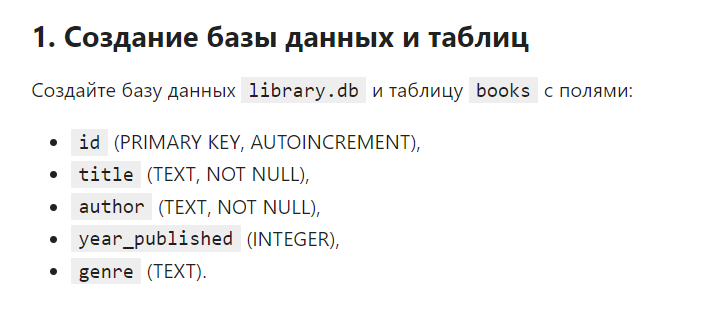

In [ ]:
import sqlite3

connection = sqlite3.connect("library.db")

cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
)
''')

connection.commit()

print("Таблица успешно создана!")

connection.close()


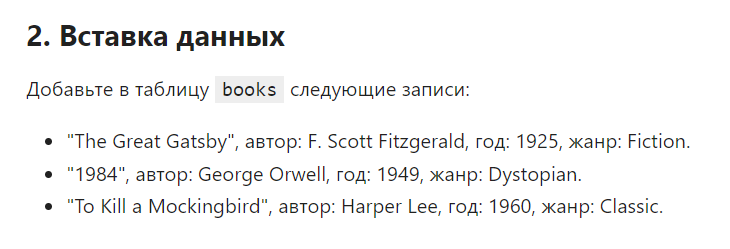

In [ ]:
import sqlite3

conn = sqlite3.connect("books.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS books (
    title TEXT,
    author TEXT,
    year INTEGER,
    genre TEXT
)
""")

data = [
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"),
    ("1984", "George Orwell", 1949, "Dystopian"),
    ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")
]
cursor.executemany("INSERT INTO books (title, author, year, genre) VALUES (?, ?, ?, ?)", data)

conn.commit()
conn.close()


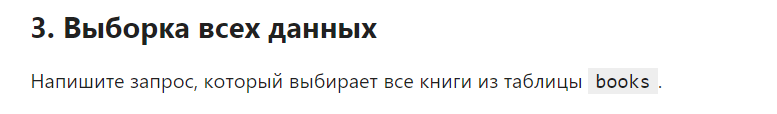

In [ ]:
SELECT * FROM books;


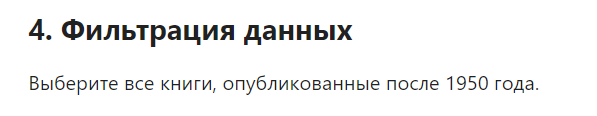

In [ ]:
SELECT *
FROM books
WHERE year > 1950;


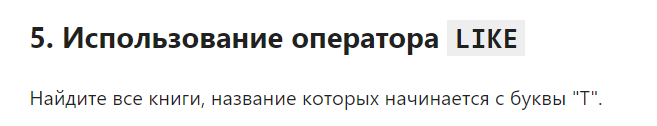

In [ ]:
SELECT *
FROM books
WHERE title LIKE 'Т%';


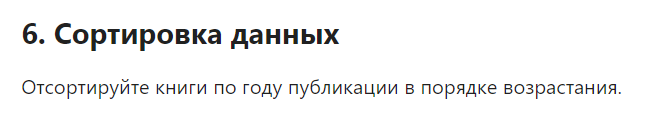

In [ ]:
SELECT *
FROM books
ORDER BY year ASC;


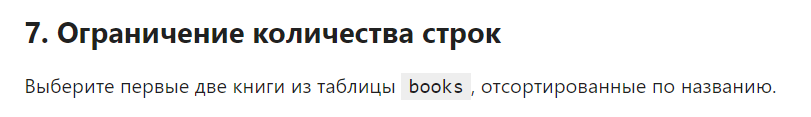

In [ ]:
SELECT *
FROM books
ORDER BY title ASC
LIMIT 2;


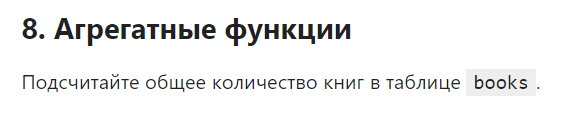

In [ ]:
SELECT COUNT(*) AS total_books
FROM books;


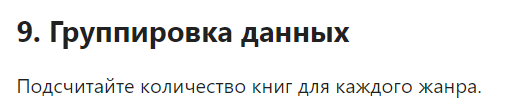

In [ ]:
SELECT genre, COUNT(*) AS book_count
FROM books
GROUP BY genre;


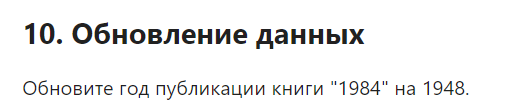

In [ ]:
UPDATE books
SET year = 1948
WHERE title = '1984';


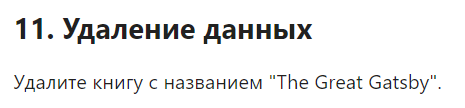

In [ ]:
DELETE FROM books
WHERE title = 'The Great Gatsby';


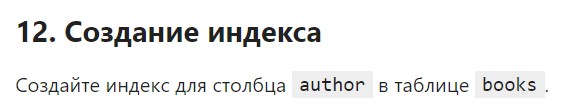

In [ ]:
CREATE INDEX idx_author
ON books (author);


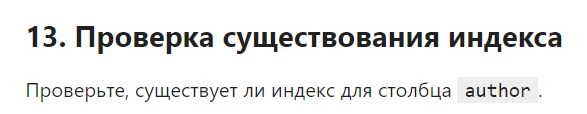

In [ ]:
SELECT name
FROM sys.indexes
WHERE object_id = OBJECT_ID('books') AND has_filter = 0;


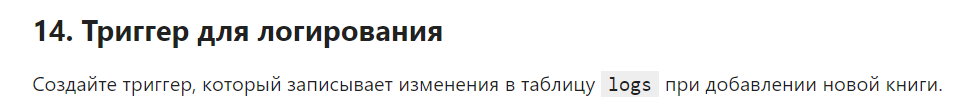

In [ ]:
CREATE TRIGGER log_new_book
AFTER INSERT ON books
FOR EACH ROW
BEGIN
    INSERT INTO logs (action, book_title, timestamp)
    VALUES ('ADD', NEW.title, CURRENT_TIMESTAMP);
END;


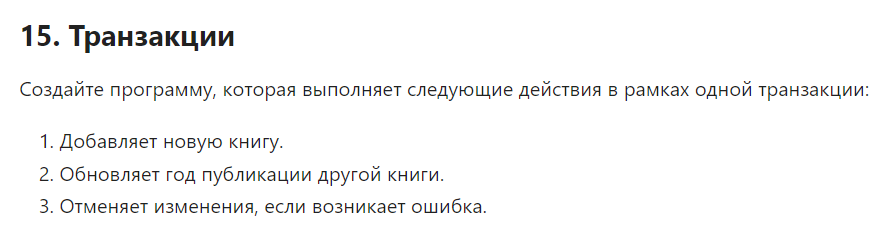

In [ ]:
import sqlite3

try:
    conn = sqlite3.connect('books.db')
    cursor = conn.cursor()

    conn.execute('BEGIN')

    cursor.execute("""
    INSERT INTO books (title, author, year, genre)
    VALUES ('The Catcher in the Rye', 'J.D. Salinger', 1951, 'Fiction')
    """)

    cursor.execute("""
    UPDATE books
    SET year = 2023
    WHERE title = '1984'
    """)

    conn.commit()

    print("Транзакция выполнена успешно!")

except sqlite3.Error as e:
    conn.rollback()
    print(f"Ошибка: {e}")

finally:
    conn.close()


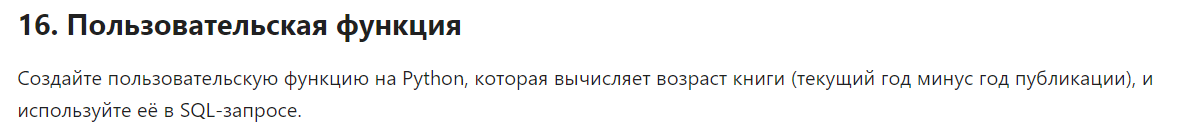

In [ ]:
import sqlite3
from datetime import datetime

def calculate_book_age(publication_year):
    current_year = datetime.now().year
    return current_year - publication_year

conn = sqlite3.connect("books.db")
cursor = conn.cursor()

cursor.execute("SELECT title, year FROM books")
books = cursor.fetchall()

for title, year in books:
    age = calculate_book_age(year)
    print(f"Книга: {title}, Год: {year}, Возраст: {age} лет")


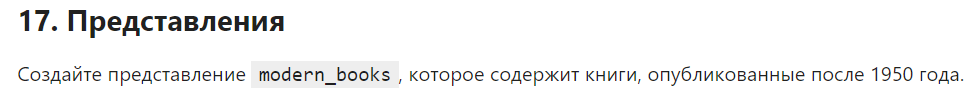

In [ ]:
CREATE VIEW modern_books AS
SELECT *
FROM books
WHERE year > 1950;


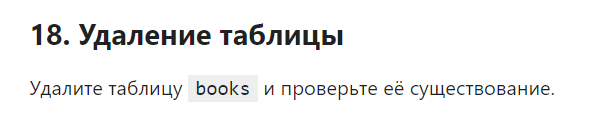

In [ ]:
DROP TABLE books;
SELECT name
FROM sqlite_master
WHERE type='table' AND name='books';


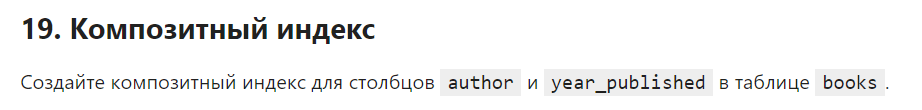

In [ ]:
CREATE INDEX idx_author_year
ON books (author, year_published);


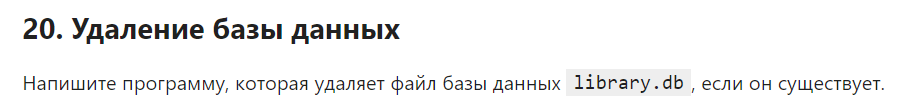

In [ ]:
import os

database_file = "library.db"

if os.path.exists(database_file):
    os.remove(database_file)
    print(f"Файл базы данных '{database_file}' успешно удалён.")
else:
    print(f"Файл базы данных '{database_file}' не найден.")


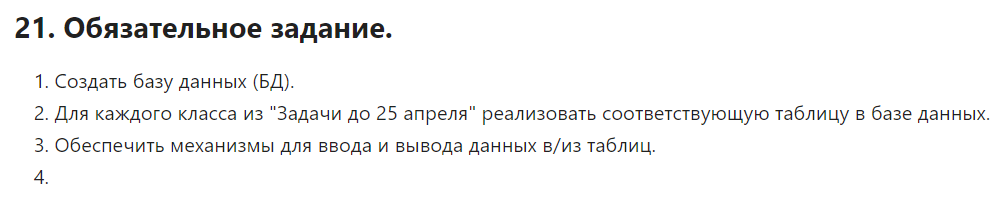

In [ ]:
import sqlite3

# Подключение к базе данных (или создание)
conn = sqlite3.connect("projects.db")
cursor = conn.cursor()

# Создание таблицы Project
cursor.execute("""
    CREATE TABLE IF NOT EXISTS Project (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        start_date TEXT,
        end_date TEXT,
        budget REAL,
        status TEXT
    )
""")

conn.commit()
conn.close()


In [ ]:
# Создание таблиц для разных типов проектов
cursor.execute("""
    CREATE TABLE IF NOT EXISTS SoftwareProject (
        project_id INTEGER PRIMARY KEY,
        programming_languages TEXT,
        FOREIGN KEY (project_id) REFERENCES Project(id)
    )
""")

cursor.execute("""
    CREATE TABLE IF NOT EXISTS MarketingProject (
        project_id INTEGER PRIMARY KEY,
        target_audience INTEGER,
        FOREIGN KEY (project_id) REFERENCES Project(id)
    )
""")

cursor.execute("""
    CREATE TABLE IF NOT EXISTS ResearchProject (
        project_id INTEGER PRIMARY KEY,
        research_field TEXT,
        FOREIGN KEY (project_id) REFERENCES Project(id)
    )
""")

conn.commit()
conn.close()


In [ ]:
def add_project(name, start_date, end_date, budget, status):
    conn = sqlite3.connect("projects.db")
    cursor = conn.cursor()

    cursor.execute("""
        INSERT INTO Project (name, start_date, end_date, budget, status) VALUES (?, ?, ?, ?, ?)
    """, (name, start_date, end_date, budget, status))

    conn.commit()
    conn.close()


def get_all_projects():
    conn = sqlite3.connect("projects.db")
    cursor = conn.cursor()

    cursor.execute("SELECT * FROM Project")
    projects = cursor.fetchall()

    conn.close()
    return projects

# Тестирование
print(get_all_projects())
